---
# Project Report: Combining and Analyzing Global Datasets
---
## 1. Wrangling Details

## 1.1 Dataset 1: Greenhouse Gas Emissions Data
- Source: Organisation for Economic Co-operation and Development (OECD) Data Explorer
- Access: https://data-explorer.oecd.org/vis?df[ds]=DisseminateFinalDMZ&df[id]=DSD_AIR_GHG%40DF_AIR_GHG&df[ag]=OECD.ENV.EPI&dq=.A.GHG._T.KG_CO2E_PS&pd=2014%2C&to[TIME_PERIOD]=false&ly[cl]=TIME_PERIOD&ly[rw]=REF_AREA&vw=tb
- Purpose: The dataset was selected due to its relevance to the study of environmental impact trends across different nations, forming a key component of this project.

### 1.1.1 Origin and Selection Rationale
The greenhouse gas emissions dataset was sourced from a reliable environmental repository (OECD). The dataset was obtained directly through the repository’s portal. It was selected for its robust country-level coverage of historical emissions data, making it ideal for cross-country and temporal analysis. From the original dataset, only three columns—`Reference area`, `TIME_PERIOD`, and `OBS_VALUE`—were selected. These columns were deemed most relevant to the objectives of this project as they represent country-level identifiers, temporal dimensions, and the quantitative emission values, respectively.

### 1.1.2 General Characteristics
The dataset is provided in a tabular CSV format, containing ***553 records and 3 columns***. The structure is straightforward, with each row representing a unique country-year observation. The selected columns were renamed to enhance clarity and usability: `Reference` area was renamed to `Country`, `TIME_PERIOD` to `Year`, and `OBS_VALUE` to `Emission Value`. This renaming aligns the data with standard nomenclature used in environmental studies and facilitates integration with other datasets. Additionally, the `Year` field was converted from `object/string` to `integer` to ensure uniformity and enable time-series analyses. The final cleaned dataset is well-structured and ready for subsequent analytical operations.

### 1.1.3 Initial Audit and Observations
An initial audit of the dataset was performed to assess its ***completeness, consistency, and accuracy***. The following checks were conducted:

- **Data Completeness:** The dataset was examined for ***missing values*** using a column-wise count of `null` entries. The results indicated ***no missing values*** in any of the three columns.
- **Data Consistency:** Duplicate records were checked to ensure no redundant entries existed. The results confirmed zero duplicate rows.
- **Data Accuracy and Uniformity:** The `Year` column contained inconsistent formatting, initially stored as strings. This was standardized by converting the column into integer format. Moreover, columns were renamed for better clarity, ensuring alignment with common analytical practices and reducing ambiguity (e.g., `Emission Value` instead of `OBS_VALUE`).



In [362]:
import pandas as pd  # For handling structured datasets

# Load Greenhouse dataset
greenhouse = pd.read_csv("greenhouse_csv.csv", usecols=["Reference area", "TIME_PERIOD", "OBS_VALUE"])
print(f"import dataset info: {greenhouse.info()}")
greenhouse

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 553 entries, 0 to 552
Data columns (total 3 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Reference area  553 non-null    object 
 1   TIME_PERIOD     553 non-null    int64  
 2   OBS_VALUE       553 non-null    float64
dtypes: float64(1), int64(1), object(1)
memory usage: 13.1+ KB
import dataset info: None


,Reference area,TIME_PERIOD,OBS_VALUE
0,Switzerland,2022,4.743798
1,Switzerland,2013,6.594462
2,Switzerland,2014,6.033563
3,Switzerland,2015,5.902717
4,Switzerland,2016,5.875100
...,...,...,...
548,Cyprus,2014,9.740121
549,Spain,2014,6.922019
550,Netherlands,2016,11.437990
551,Liechtenstein,2013,6.284657


In [363]:
# Count missing values
missing_values = greenhouse.isna().sum()
print(f"Missing values:\n{missing_values}")

# Check for duplicate rows
duplicate_rows = greenhouse.duplicated().sum()
print(f"Duplicate rows: {duplicate_rows}")

Missing values:
Reference area    0
TIME_PERIOD       0
OBS_VALUE         0
dtype: int64
Duplicate rows: 0


In [364]:
# Clean and prepare the Greenhouse dataset
greenhouse.rename(columns={
    "Reference area": "Country",
    "TIME_PERIOD": "Year",
    "OBS_VALUE": "Emission Value"
}, inplace=True)

# Sort Greenhouse dataset
greenhouse=greenhouse.sort_values(by=["Country", "Year"], ascending=[True, False]).reset_index(drop=True)

print(f"Cleaned dataset info: {greenhouse.info()}")
greenhouse

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 553 entries, 0 to 552
Data columns (total 3 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Country         553 non-null    object 
 1   Year            553 non-null    int64  
 2   Emission Value  553 non-null    float64
dtypes: float64(1), int64(1), object(1)
memory usage: 13.1+ KB
Cleaned dataset info: None


,Country,Year,Emission Value
0,Argentina,2020,8.295901
1,Argentina,2019,7.343352
2,Argentina,2018,8.266537
3,Argentina,2017,8.367887
4,Argentina,2016,8.292151
...,...,...,...
548,United States,2017,20.182650
549,United States,2016,20.362140
550,United States,2015,21.005740
551,United States,2014,21.667150


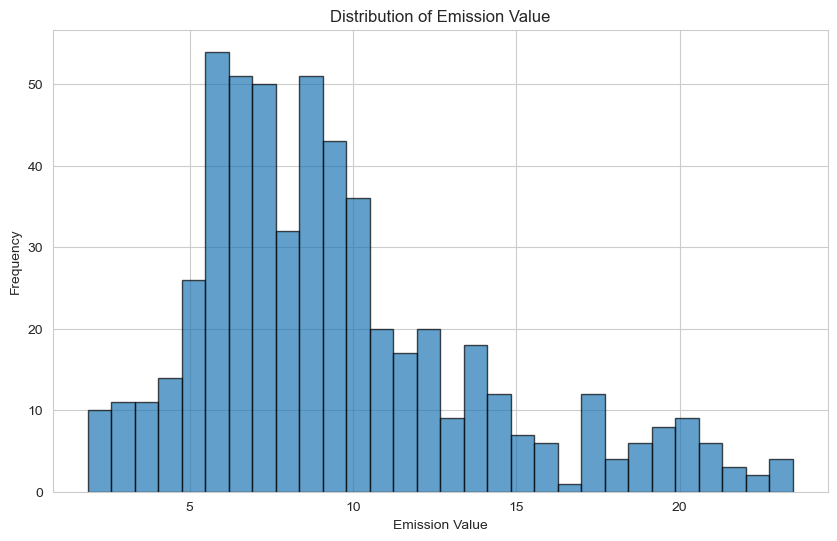

In [365]:
import matplotlib.pyplot as plt

# 绘制直方图
plt.figure(figsize=(10, 6))
plt.hist(greenhouse["Emission Value"], bins=30, edgecolor='black', alpha=0.7)
plt.title("Distribution of Emission Value")
plt.xlabel("Emission Value")
plt.ylabel("Frequency")
plt.show()
from sklearn.preprocessing import MinMaxScaler

In [366]:
from sklearn.preprocessing import MinMaxScaler

# normalize the data to range[0, 1]
scaler = MinMaxScaler()
greenhouse["Emission Value Normalized"] = scaler.fit_transform(greenhouse[["Emission Value"]])

print(greenhouse[["Emission Value", "Emission Value Normalized"]].head())

   Emission Value  Emission Value Normalized
0        8.295901                   0.297042
1        7.343352                   0.252876
2        8.266537                   0.295680
3        8.367887                   0.300380
4        8.292151                   0.296868


C:\Users\furao\AppData\Local\Temp\ipykernel_4956\1450041461.py:5: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(greenhouse["Emission Value"], label="Original", shade=True)
C:\Users\furao\AppData\Local\Temp\ipykernel_4956\1450041461.py:6: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(greenhouse["Emission Value Normalized"], label="Normalized", shade=True)


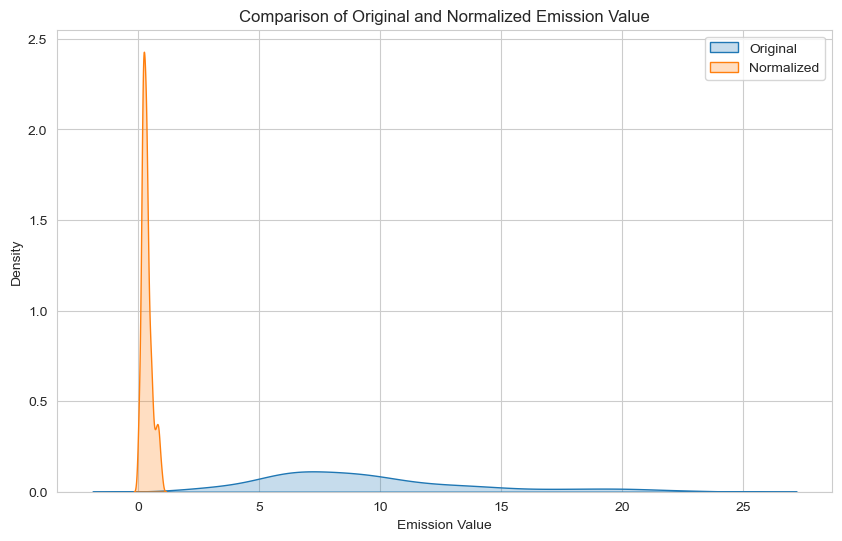

In [367]:
import seaborn as sns

# comparision visual between the original and normalised data
plt.figure(figsize=(10, 6))
sns.kdeplot(greenhouse["Emission Value"], label="Original", shade=True)
sns.kdeplot(greenhouse["Emission Value Normalized"], label="Normalized", shade=True)
plt.title("Comparison of Original and Normalized Emission Value")
plt.xlabel("Emission Value")
plt.ylabel("Density")
plt.legend()
plt.show()


In [368]:
greenhouse

,Country,Year,Emission Value,Emission Value Normalized
0,Argentina,2020,8.295901,0.297042
1,Argentina,2019,7.343352,0.252876
2,Argentina,2018,8.266537,0.295680
3,Argentina,2017,8.367887,0.300380
4,Argentina,2016,8.292151,0.296868
...,...,...,...,...
548,United States,2017,20.182650,0.848178
549,United States,2016,20.362140,0.856500
550,United States,2015,21.005740,0.886341
551,United States,2014,21.667150,0.917008


## 1.2 Dataset 2: World Development Indicators (WDI)
- Source: DataBank World Development Indicators (WDI)
- Access: https://databank.worldbank.org/reports.aspx?source=2&country=ARE
- Purpose: The dataset was selected due to its relevance to the study of environmental impact trends across different nations, forming a key component of this project.

### 1.2.1 Data Sourcing
The dataset used for this analysis is the World Development Indicators (WDI), sourced from the World Bank’s DataBank. The direct access link to the dataset is above. This dataset was chosen due to its comprehensive collection of global development indicators, which include economic, environmental, and social data relevant for cross-country analyses and studying environmental trends.

The dataset was provided in CSV format, making it easy to load and manipulate programmatically. Initially, it contained 2660 rows and 9 columns. The columns represented metrics such as `"Industry Value Added (% of GDP)"`, `"GDP (current US$)"`, `"GDP per Capita (current US$)"`, `"Renewable Energy Consumption (% of total final energy consumption)"`, `"Forest Area (% of land area)"`, and other metadata fields like `"Time Code"` and `"Country Code"`. These fields were evaluated for relevance, and unnecessary ones were excluded to streamline the dataset for analysis.

### 1.2.2 Data Wrangling
Data wrangling was conducted systematically to clean, transform, and prepare the dataset for further analysis. The steps taken during this process are as follows:

- **Column Renaming**

To improve clarity and ensure consistency, all column names were renamed to more concise and meaningful terms. For example, "GDP (current US$)" was renamed to `"GDP (US$)"`, and `"Country Name"` was simplified to `"Country"`. Additionally, formatting discrepancies in country names were standardized. For instance, "China, People's Republic of" was corrected to "China", and "Korea, Rep." was changed to "Korea".

- **Removal of Unnecessary Columns**

Metadata columns such as `"Time Code"` and `"Country Code"` were deemed redundant and dropped. This decision reduced the dataset to 7 essential columns for analysis.

- **Data Type Conversion**

The `"Year"` column, initially stored as text, was converted to integers for numerical operations. Similarly, numeric columns such as `"GDP (US$)"` and `"GDP per Capita (US$)"` were explicitly converted to float data types to ensure mathematical operations could be performed without errors.

- **Handling Missing Values**

    - An audit of the dataset revealed missing values in several columns. Specifically:
    - `Industry Value Added (% of GDP):` 207 missing values
    - `GDP (US$)` and `GDP per Capita (US$)`: 88 missing values each
    - `Renewable Energy Consumption (%)`: 297 missing values
    - `Forest Area (%):` 302 missing values
    
These missing values were handled by removing rows with missing data (dropna()), resulting in a cleaned dataset with 2128 rows. This ensured data completeness and consistency for further analysis.

- **Log Transformation**

To address the issue of large-scale differences in the GDP and GDP per capita metrics, a log transformation was applied. This transformation helped normalize the data range, making it more interpretable and reducing the impact of extreme values. Two new columns, `"Log GDP (US$)"` and `"Log GDP per Capita (US$)",` were added to the dataset to retain the original scale while providing log-transformed alternatives.

- **Numerical Conversion for Indicators**

Columns representing indicators such as `"Renewable Energy Consumption (%)"` and `"Forest Area (%)"` were converted to numeric data types to address any non-numeric entries or formatting inconsistencies. Coercion during conversion ensured invalid entries were treated as NaN and subsequently handled.

In [369]:
# Import necessary libraries
import pandas as pd  # For handling structured datasets
import numpy as np  # For numerical computations
import matplotlib.pyplot as plt  # For visualization
import seaborn as sns  # For advanced visualizations

# Load WDI dataset
wdi = pd.read_csv("wdi.csv", encoding="latin1", on_bad_lines="skip")[:-8]  # Exclude extra footer rows
print(f"Dataset loaded. Shape: {wdi.shape}")
wdi.head()

# Drop unnecessary columns
wdi.drop(columns=["Time Code", "Country Code"], inplace=True, errors='ignore')


# Inspect basic structure of the original dataset
print(f"dataset info: {wdi.info()}")
wdi

Dataset loaded. Shape: (2660, 9)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2660 entries, 0 to 2659
Data columns (total 7 columns):
 #   Column                                                                               Non-Null Count  Dtype 
---  ------                                                                               --------------  ----- 
 0   Time                                                                                 2660 non-null   object
 1   Country Name                                                                         2660 non-null   object
 2   Industry (including construction), value added (% of GDP) [NV.IND.TOTL.ZS]           2660 non-null   object
 3   GDP (current US$) [NY.GDP.MKTP.CD]                                                   2660 non-null   object
 4   GDP per capita (current US$) [NY.GDP.PCAP.CD]                                        2660 non-null   object
 5   Renewable energy consumption (% of total final energy consumption

,Time,Country Name,"Industry (including construction), value added (% of GDP) [NV.IND.TOTL.ZS]",GDP (current US$) [NY.GDP.MKTP.CD],GDP per capita (current US$) [NY.GDP.PCAP.CD],Renewable energy consumption (% of total final energy consumption) [EG.FEC.RNEW.ZS],Forest area (% of land area) [AG.LND.FRST.ZS]
0,2013,United Arab Emirates,54.2038149769832,400218529748.128,45729.607675743,0.1,4.46775556181357
1,2013,Afghanistan,20.4446053132561,20146416757.5987,638.73318101404,16.9,1.85278199408184
2,2013,Albania,23.0613168520051,12776224496.9718,4413.06338346821,41.1,28.6985583941606
3,2013,Algeria,39.7438543670176,229701430292.157,6044.67490330703,0.1,0.814866442180927
4,2013,American Samoa,..,638000000,12038.8715916596,0.2,86.7
...,...,...,...,...,...,...,...
2655,2022,Sub-Saharan Africa,28.2830061123353,2061102939319.23,1701.71726642046,..,..
2656,2022,Sub-Saharan Africa (excluding high income),28.299559434653,2059044970799.4,1700.18641364767,..,..
2657,2022,Sub-Saharan Africa (IDA & IBRD countries),28.2830061123353,2061102939319.23,1701.71726642046,..,..
2658,2022,Upper middle income,36.8063811729757,28567593041349.3,10190.883998462,..,..


In [370]:
# Rename columns for clarity
wdi.rename(columns={
    "Time": "Year",
    "Country Name": "Country",
    "Industry (including construction), value added (% of GDP) [NV.IND.TOTL.ZS]": "Industry Value Added (% of GDP)",
    "GDP (current US$) [NY.GDP.MKTP.CD]": "GDP (US$)",
    "GDP per capita (current US$) [NY.GDP.PCAP.CD]": "GDP per Capita (US$)",
    "Renewable energy consumption (% of total final energy consumption) [EG.FEC.RNEW.ZS]": "Renewable Energy Consumption (%)",
    "Forest area (% of land area) [AG.LND.FRST.ZS]": "Forest Area (%)"
}, inplace=True)

wdi['Country'] = wdi['Country'].replace({
    'China': "China (People's Republic of)",
    'Korea, Rep.': 'Korea',
    'Russian Federation': 'Russia',
    'Turkiye': 'Türkiye'
})

print(f"dataset info: {wdi.info()}")

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2660 entries, 0 to 2659
Data columns (total 7 columns):
 #   Column                            Non-Null Count  Dtype 
---  ------                            --------------  ----- 
 0   Year                              2660 non-null   object
 1   Country                           2660 non-null   object
 2   Industry Value Added (% of GDP)   2660 non-null   object
 3   GDP (US$)                         2660 non-null   object
 4   GDP per Capita (US$)              2660 non-null   object
 5   Renewable Energy Consumption (%)  2660 non-null   object
 6   Forest Area (%)                   2660 non-null   object
dtypes: object(7)
memory usage: 145.6+ KB
dataset info: None


In [371]:
wdi["Year"] = wdi["Year"].astype(int)
print(f"dataset info: {wdi.info()}")

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2660 entries, 0 to 2659
Data columns (total 7 columns):
 #   Column                            Non-Null Count  Dtype 
---  ------                            --------------  ----- 
 0   Year                              2660 non-null   int32 
 1   Country                           2660 non-null   object
 2   Industry Value Added (% of GDP)   2660 non-null   object
 3   GDP (US$)                         2660 non-null   object
 4   GDP per Capita (US$)              2660 non-null   object
 5   Renewable Energy Consumption (%)  2660 non-null   object
 6   Forest Area (%)                   2660 non-null   object
dtypes: int32(1), object(6)
memory usage: 135.2+ KB
dataset info: None


In [372]:
indicators_to_convert = [
    "Industry Value Added (% of GDP)",
    "GDP (US$)",
    "GDP per Capita (US$)",
    "Renewable Energy Consumption (%)",
    "Forest Area (%)"
]
for col in indicators_to_convert:
    wdi[col] = pd.to_numeric(wdi[col], errors="coerce")
    
print(f"dataset info: {wdi.info()}")

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2660 entries, 0 to 2659
Data columns (total 7 columns):
 #   Column                            Non-Null Count  Dtype  
---  ------                            --------------  -----  
 0   Year                              2660 non-null   int32  
 1   Country                           2660 non-null   object 
 2   Industry Value Added (% of GDP)   2453 non-null   float64
 3   GDP (US$)                         2572 non-null   float64
 4   GDP per Capita (US$)              2572 non-null   float64
 5   Renewable Energy Consumption (%)  2363 non-null   float64
 6   Forest Area (%)                   2358 non-null   float64
dtypes: float64(5), int32(1), object(1)
memory usage: 135.2+ KB
dataset info: None


In [373]:
# Count missing values in each column
missing_values = wdi.isna().sum()
print(f"Missing values per column:\n{missing_values}")

# Check for duplicate rows
duplicate_rows = wdi.duplicated().sum()
print(f"Number of duplicate rows: {duplicate_rows}")


Missing values per column:
Year                                  0
Country                               0
Industry Value Added (% of GDP)     207
GDP (US$)                            88
GDP per Capita (US$)                 88
Renewable Energy Consumption (%)    297
Forest Area (%)                     302
dtype: int64
Number of duplicate rows: 0


In [374]:
# Remove rows with missing values
wdi_cleaned = wdi.dropna()
print(f"dataset info: {wdi_cleaned.info()}")

<class 'pandas.core.frame.DataFrame'>
Index: 2128 entries, 0 to 2344
Data columns (total 7 columns):
 #   Column                            Non-Null Count  Dtype  
---  ------                            --------------  -----  
 0   Year                              2128 non-null   int32  
 1   Country                           2128 non-null   object 
 2   Industry Value Added (% of GDP)   2128 non-null   float64
 3   GDP (US$)                         2128 non-null   float64
 4   GDP per Capita (US$)              2128 non-null   float64
 5   Renewable Energy Consumption (%)  2128 non-null   float64
 6   Forest Area (%)                   2128 non-null   float64
dtypes: float64(5), int32(1), object(1)
memory usage: 124.7+ KB
dataset info: None


In [375]:
# Add log-transformed columns for GDP values
wdi_cleaned["GDP (US$)"] = pd.to_numeric(wdi_cleaned["GDP (US$)"], errors="coerce")
wdi_cleaned["GDP per Capita (US$)"] = pd.to_numeric(wdi_cleaned["GDP per Capita (US$)"], errors="coerce")

wdi_cleaned["Log GDP (US$)"] = np.log(wdi_cleaned["GDP (US$)"])
wdi_cleaned["Log GDP per Capita (US$)"] = np.log(wdi_cleaned["GDP per Capita (US$)"])

print(f"dataset info: {wdi_cleaned.info()}")

<class 'pandas.core.frame.DataFrame'>
Index: 2128 entries, 0 to 2344
Data columns (total 9 columns):
 #   Column                            Non-Null Count  Dtype  
---  ------                            --------------  -----  
 0   Year                              2128 non-null   int32  
 1   Country                           2128 non-null   object 
 2   Industry Value Added (% of GDP)   2128 non-null   float64
 3   GDP (US$)                         2128 non-null   float64
 4   GDP per Capita (US$)              2128 non-null   float64
 5   Renewable Energy Consumption (%)  2128 non-null   float64
 6   Forest Area (%)                   2128 non-null   float64
 7   Log GDP (US$)                     2128 non-null   float64
 8   Log GDP per Capita (US$)          2128 non-null   float64
dtypes: float64(7), int32(1), object(1)
memory usage: 157.9+ KB
dataset info: None


C:\Users\furao\AppData\Local\Temp\ipykernel_4956\2437630864.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  wdi_cleaned["GDP (US$)"] = pd.to_numeric(wdi_cleaned["GDP (US$)"], errors="coerce")
C:\Users\furao\AppData\Local\Temp\ipykernel_4956\2437630864.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  wdi_cleaned["GDP per Capita (US$)"] = pd.to_numeric(wdi_cleaned["GDP per Capita (US$)"], errors="coerce")
C:\Users\furao\AppData\Local\Temp\ipykernel_4956\2437630864.py:5: SettingWithCopyWarning: 
A value

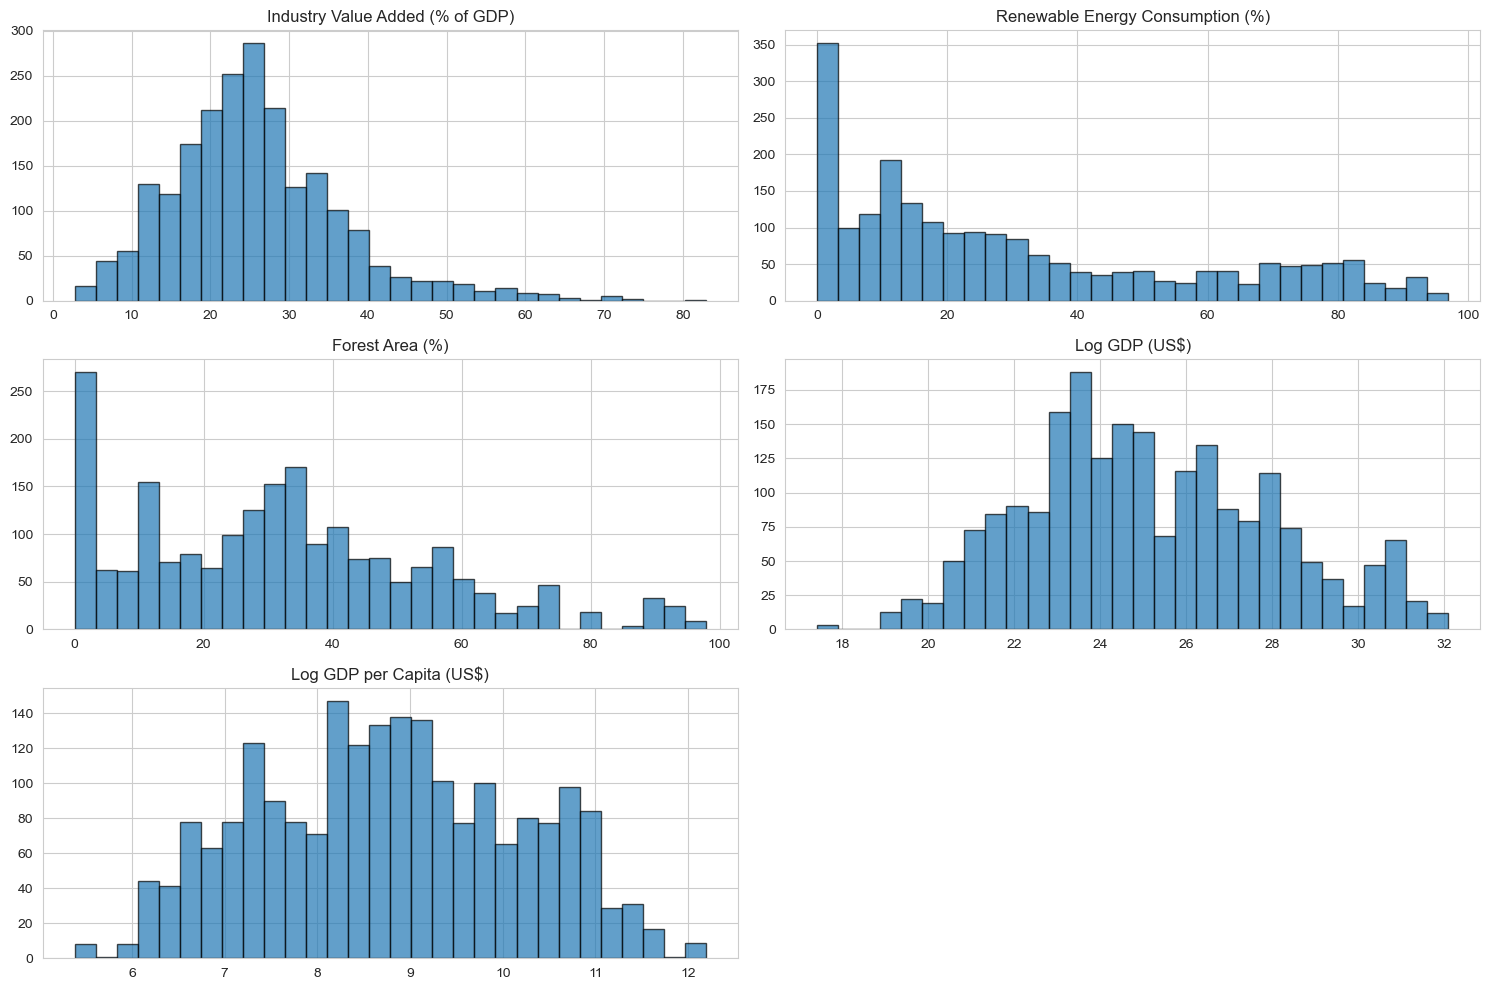

In [376]:
import matplotlib.pyplot as plt

# 自动选择数值列并排除 'Year' 和 'Country'
numeric_columns = wdi_cleaned.select_dtypes(include='number').columns
numeric_columns = numeric_columns.drop(['Year', 'Country','GDP (US$)','GDP per Capita (US$)'], errors='ignore')

# 创建子图
plt.figure(figsize=(15, 10))
for i, column in enumerate(numeric_columns, 1):
    plt.subplot((len(numeric_columns) + 1) // 2, 2, i)
    plt.hist(wdi_cleaned[column], bins=30, edgecolor='black', alpha=0.7)
    plt.title(column)
    plt.tight_layout()
plt.show()

In [377]:
# normalize the data to range[0, 1]
scaler = MinMaxScaler()
wdi_cleaned["Renewable Energy Consumption (%) Normalized"] = scaler.fit_transform(wdi_cleaned[["Renewable Energy Consumption (%)"]])
wdi_cleaned["Forest Area (%) Normalized"] = scaler.fit_transform(wdi_cleaned[["Forest Area (%)"]])


print(f"cleaned dataset info: {wdi_cleaned.info()}")
wdi_cleaned

<class 'pandas.core.frame.DataFrame'>
Index: 2128 entries, 0 to 2344
Data columns (total 11 columns):
 #   Column                                       Non-Null Count  Dtype  
---  ------                                       --------------  -----  
 0   Year                                         2128 non-null   int32  
 1   Country                                      2128 non-null   object 
 2   Industry Value Added (% of GDP)              2128 non-null   float64
 3   GDP (US$)                                    2128 non-null   float64
 4   GDP per Capita (US$)                         2128 non-null   float64
 5   Renewable Energy Consumption (%)             2128 non-null   float64
 6   Forest Area (%)                              2128 non-null   float64
 7   Log GDP (US$)                                2128 non-null   float64
 8   Log GDP per Capita (US$)                     2128 non-null   float64
 9   Renewable Energy Consumption (%) Normalized  2128 non-null   float64
 10  Fores

C:\Users\furao\AppData\Local\Temp\ipykernel_4956\1278705734.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  wdi_cleaned["Renewable Energy Consumption (%) Normalized"] = scaler.fit_transform(wdi_cleaned[["Renewable Energy Consumption (%)"]])
C:\Users\furao\AppData\Local\Temp\ipykernel_4956\1278705734.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  wdi_cleaned["Forest Area (%) Normalized"] = scaler.fit_transform(wdi_cleaned[["Forest Area (%)"]])


,Year,Country,Industry Value Added (% of GDP),GDP (US$),GDP per Capita (US$),Renewable Energy Consumption (%),Forest Area (%),Log GDP (US$),Log GDP per Capita (US$),Renewable Energy Consumption (%) Normalized,Forest Area (%) Normalized
0,2013,United Arab Emirates,54.203815,4.002185e+11,45729.607676,0.1,4.467756,26.715277,10.730501,0.001031,0.045640
1,2013,Afghanistan,20.444605,2.014642e+10,638.733181,16.9,1.852782,23.726292,6.459487,0.174227,0.018927
2,2013,Albania,23.061317,1.277622e+10,4413.063383,41.1,28.698558,23.270852,8.392324,0.423711,0.293169
3,2013,Algeria,39.743854,2.297014e+11,6044.674903,0.1,0.814866,26.160046,8.706933,0.001031,0.008324
5,2013,Andorra,10.618247,3.193513e+09,44747.753864,19.1,34.042553,21.884387,10.708797,0.196907,0.347761
...,...,...,...,...,...,...,...,...,...,...,...
2336,2021,Uzbekistan,31.490751,6.960061e+10,1993.424478,1.0,8.431805,24.966039,7.597609,0.010309,0.086135
2339,2021,Viet Nam,37.391519,3.664748e+11,3759.948329,24.2,46.961162,26.627195,8.232160,0.249485,0.479731
2341,2021,West Bank and Gaza,17.685129,1.810900e+10,3678.635657,15.4,1.682988,23.619675,8.210297,0.158763,0.017193
2343,2021,Zambia,41.831938,2.209642e+10,1134.713454,83.0,60.030150,23.818681,7.034135,0.855670,0.613237


C:\Users\furao\AppData\Local\Temp\ipykernel_4956\2241732330.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  wdi_cleaned[normalized_column_name] = MinMaxScaler().fit_transform(wdi_cleaned[[column]])
C:\Users\furao\AppData\Local\Temp\ipykernel_4956\2241732330.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  wdi_cleaned[normalized_column_name] = MinMaxScaler().fit_transform(wdi_cleaned[[column]])


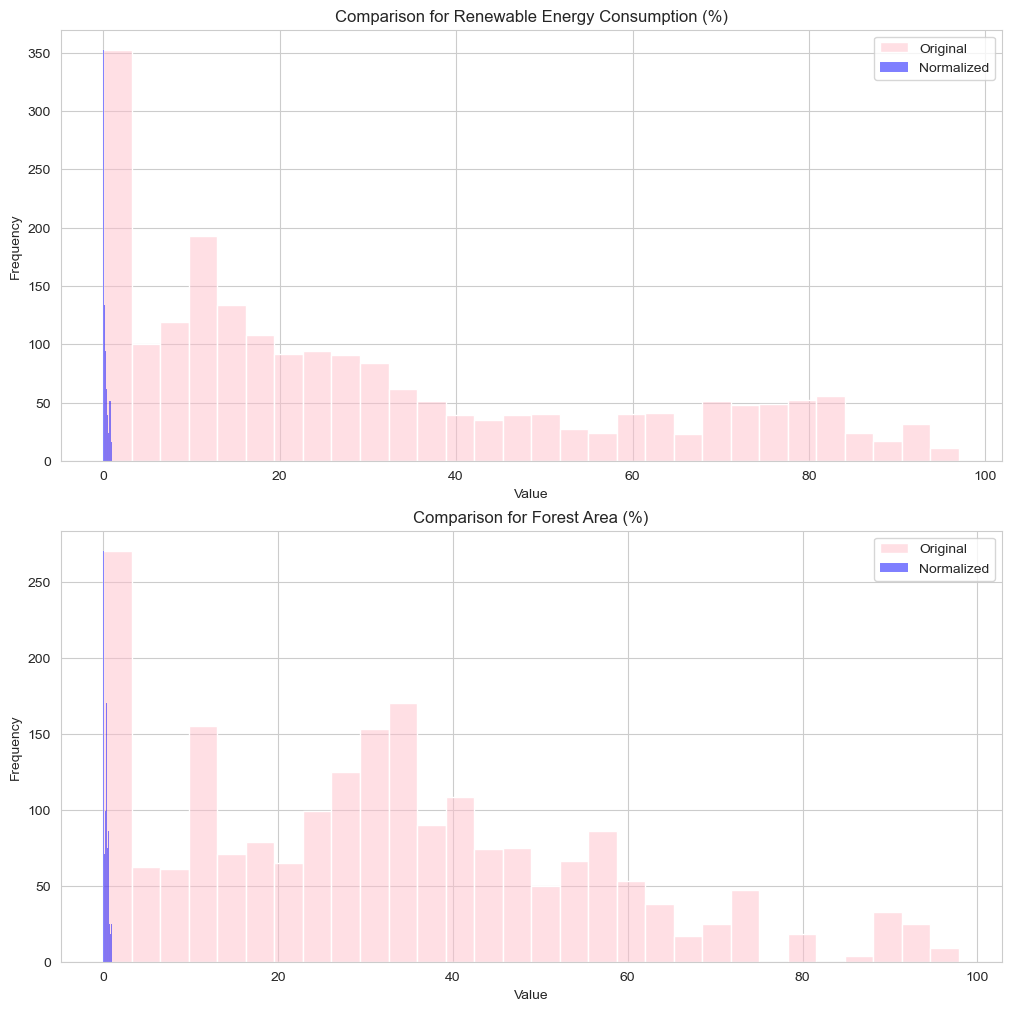

In [378]:
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import MinMaxScaler

columns_to_normalize = [
    "Renewable Energy Consumption (%)",
    "Forest Area (%)",
]

# Normalize the data for each column
for column in columns_to_normalize:
    normalized_column_name = f"{column} Normalized"
    wdi_cleaned[normalized_column_name] = MinMaxScaler().fit_transform(wdi_cleaned[[column]])

fig, axes = plt.subplots(nrows=len(columns_to_normalize), ncols=1, figsize=(10, 10), constrained_layout=True)

for i, column in enumerate(columns_to_normalize):
    normalized_column = f"{column} Normalized"
    ax = axes[i]

    sns.histplot(wdi_cleaned[column], bins=30, color="pink", alpha=0.5, label="Original", ax=ax)

    sns.histplot(wdi_cleaned[normalized_column], bins=30, color="blue", alpha=0.5, label="Normalized", ax=ax)

    ax.set_title(f"Comparison for {column}")
    ax.set_xlabel("Value")
    ax.set_ylabel("Frequency")
    ax.legend()

plt.show()


### 1.3 Combining the Datasets

To analyze relationships across economic and environmental indicators, the cleaned datasets from the Greenhouse Gas Emissions and World Development Indicators (WDI) datasets were merged. This step ensured consistency and allowed for further statistical analysis. The datasets were merged using the "Country" and "Year" fields as the primary keys, aligning observations from both sources. An inner join method (how="inner") was applied to retain only matching records from both datasets, ensuring data integrity and compatibility.

Following the merge, the combined dataset was structured for panel data analysis by setting a multi-index using "Country" and "Year". This multi-index arrangement facilitates advanced analytical techniques, such as fixed-effects or random-effects regression models, which account for variations across countries and years. The resulting dataset contains key variables, including emissions values, GDP metrics, renewable energy consumption, and forest area coverage, now aligned across countries and time periods. This structured dataset provides a robust foundation for further modeling and exploratory analysis.

In [379]:
# Merge cleaned datasets
merged_data = pd.merge(
    greenhouse, 
    wdi_cleaned, 
    on=["Country", "Year"], 
    how="inner"
)

# Set index for regression analysis
merged_data.set_index(["Country", "Year"], inplace=True)
print(f"combined dataset info: {merged_data.info()}")
merged_data

<class 'pandas.core.frame.DataFrame'>
MultiIndex: 454 entries, ('Argentina', 2020) to ('United States', 2013)
Data columns (total 11 columns):
 #   Column                                       Non-Null Count  Dtype  
---  ------                                       --------------  -----  
 0   Emission Value                               454 non-null    float64
 1   Emission Value Normalized                    454 non-null    float64
 2   Industry Value Added (% of GDP)              454 non-null    float64
 3   GDP (US$)                                    454 non-null    float64
 4   GDP per Capita (US$)                         454 non-null    float64
 5   Renewable Energy Consumption (%)             454 non-null    float64
 6   Forest Area (%)                              454 non-null    float64
 7   Log GDP (US$)                                454 non-null    float64
 8   Log GDP per Capita (US$)                     454 non-null    float64
 9   Renewable Energy Consumption (%) Norma

Emission Value  Emission Value Normalized  \
Country       Year                                              
Argentina     2020        8.295901                   0.297042   
              2019        7.343352                   0.252876   
              2018        8.266537                   0.295680   
              2017        8.367887                   0.300380   
              2016        8.292151                   0.296868   
...                            ...                        ...   
United States 2017       20.182650                   0.848178   
              2016       20.362140                   0.856500   
              2015       21.005740                   0.886341   
              2014       21.667150                   0.917008   
              2013       21.646720                   0.916061   

                    Industry Value Added (% of GDP)     GDP (US$)  \
Country       Year                                                  
Argentina     2020                        22.408876  3.857405e+11   
              2019                        23.157848  4.477547e+11   
              2018                        23.719592  5.248199e+11   
              2017                        21.782123  6.436284e+11   
              2016                        22.054107  5.575323e+11   
...                                             ...           ...   
United States 2017                        18.308744  1.961210e+13   
              2016                        17.936872  1.880491e+13   
              2015                        18.496713  1.829502e+13   
              2014                        19.268434  1.760814e+13   
              2013                        19.198890  1.688068e+13   

                    GDP per Capita (US$)  Renewable Energy Consumption (%)  \
Country       Year                                                           
Argentina     2020           8500.837939                               9.8   
              2019           9963.674162                              10.7   
              2018          11795.162745                              10.5   
              2017          14613.035649                              10.4   
              2016          12790.264140                               9.4   
...                                  ...                               ...   
United States 2017          60322.261424                               9.7   
              2016          58206.614193                               9.3   
              2015          57040.208214                               8.9   
              2014          55304.315532                               9.0   
              2013          53409.750777                               8.9   

                    Forest Area (%)  Log GDP (US$)  Log GDP per Capita (US$)  \
Country       Year                                                             
Argentina     2020        10.440715      26.678431                  9.047920   
              2019        10.480179      26.827511                  9.206701   
              2018        10.520373      26.986321                  9.375445   
              2017        10.559837      27.190387                  9.589669   
              2016        10.600397      27.046786                  9.456440   
...                             ...            ...                       ...   
United States 2017        33.866926      30.607168                 11.007456   
              2016        33.899723      30.565139                 10.971754   
              2015        33.899723      30.537650                 10.951512   
              2014        33.869659      30.499382                 10.920606   
              2013        33.839596      30.457191                 10.885749   

                    Renewable Energy Consumption (%) Normalized  \
Country       Year                                                
Argentina     2020                                     0.101031   
              2019 

The combined dataset was exported as combined_dataset.csv, retaining the "Country" and "Year" multi-index structure (index=True) for panel data analysis. This clean, integrated dataset is ready for further analysis, preserving its temporal and geographical context for exploring relationships between key variables.

In [380]:
# Save the final dataset
merged_data.to_csv("combined_dataset.csv", index=True)

correlation matrix

                                             Emission Value Normalized  \
Emission Value Normalized                                     1.000000   
Industry Value Added (% of GDP)                              -0.024780   
Log GDP (US$)                                                 0.236093   
Log GDP per Capita (US$)                                      0.318690   
Renewable Energy Consumption (%) Normalized                  -0.239824   
Forest Area (%) Normalized                                   -0.173379   

                                             Industry Value Added (% of GDP)  \
Emission Value Normalized                                          -0.024780   
Industry Value Added (% of GDP)                                     1.000000   
Log GDP (US$)                                                       0.038313   
Log GDP per Capita (US$)                                           -0.181911   
Renewable Energy Consumption (%) Normalized                         0.048973   
F

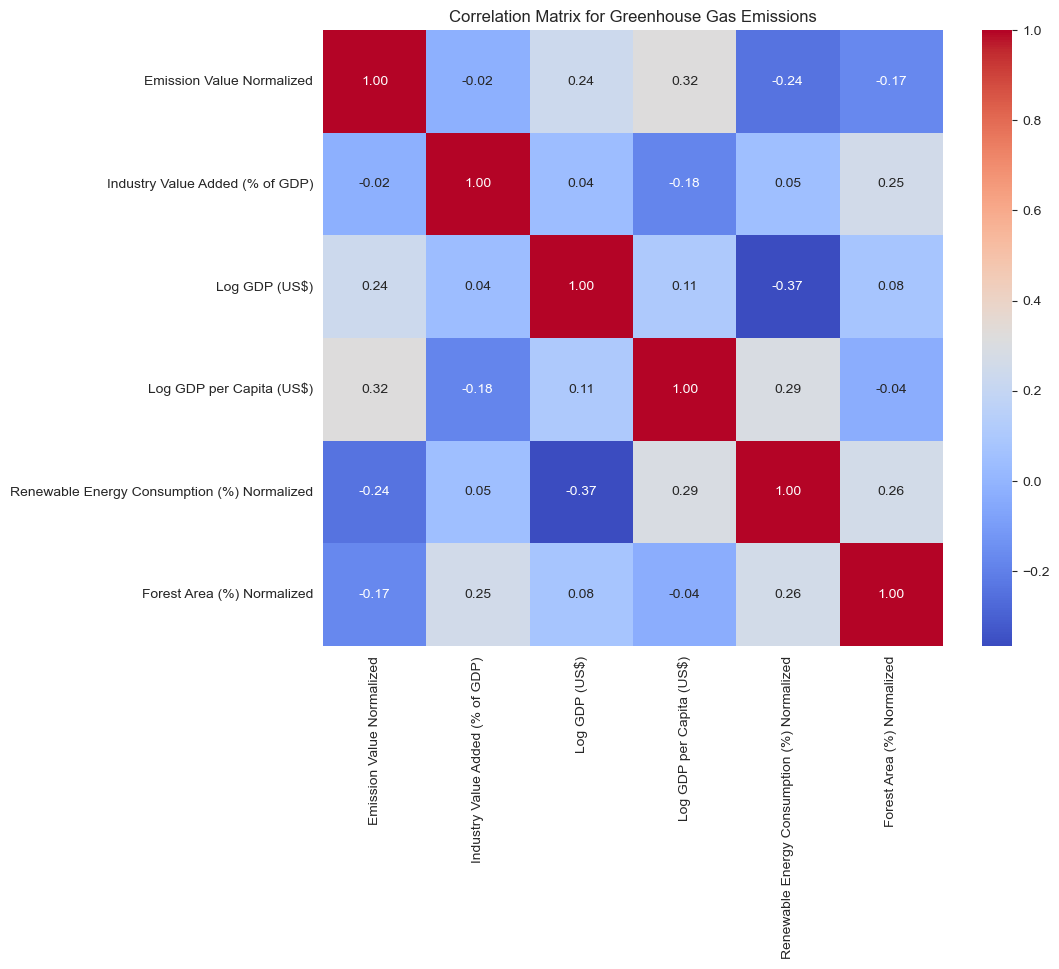

In [381]:
import matplotlib.pyplot as plt  # For creating visualizations
import seaborn as sns  # For advanced and aesthetically pleasing plots

greenhouse_gases = merged_data[[
    "Emission Value Normalized",
    "Industry Value Added (% of GDP)",
    "Log GDP (US$)",
    "Log GDP per Capita (US$)",
    "Renewable Energy Consumption (%) Normalized",
    "Forest Area (%) Normalized"
]]

# 计算相关性矩阵
correlation_matrix = greenhouse_gases.corr()

# 输出相关性矩阵
print(correlation_matrix)


plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap="coolwarm", fmt=".2f")
plt.title("Correlation Matrix for Greenhouse Gas Emissions")
plt.show()


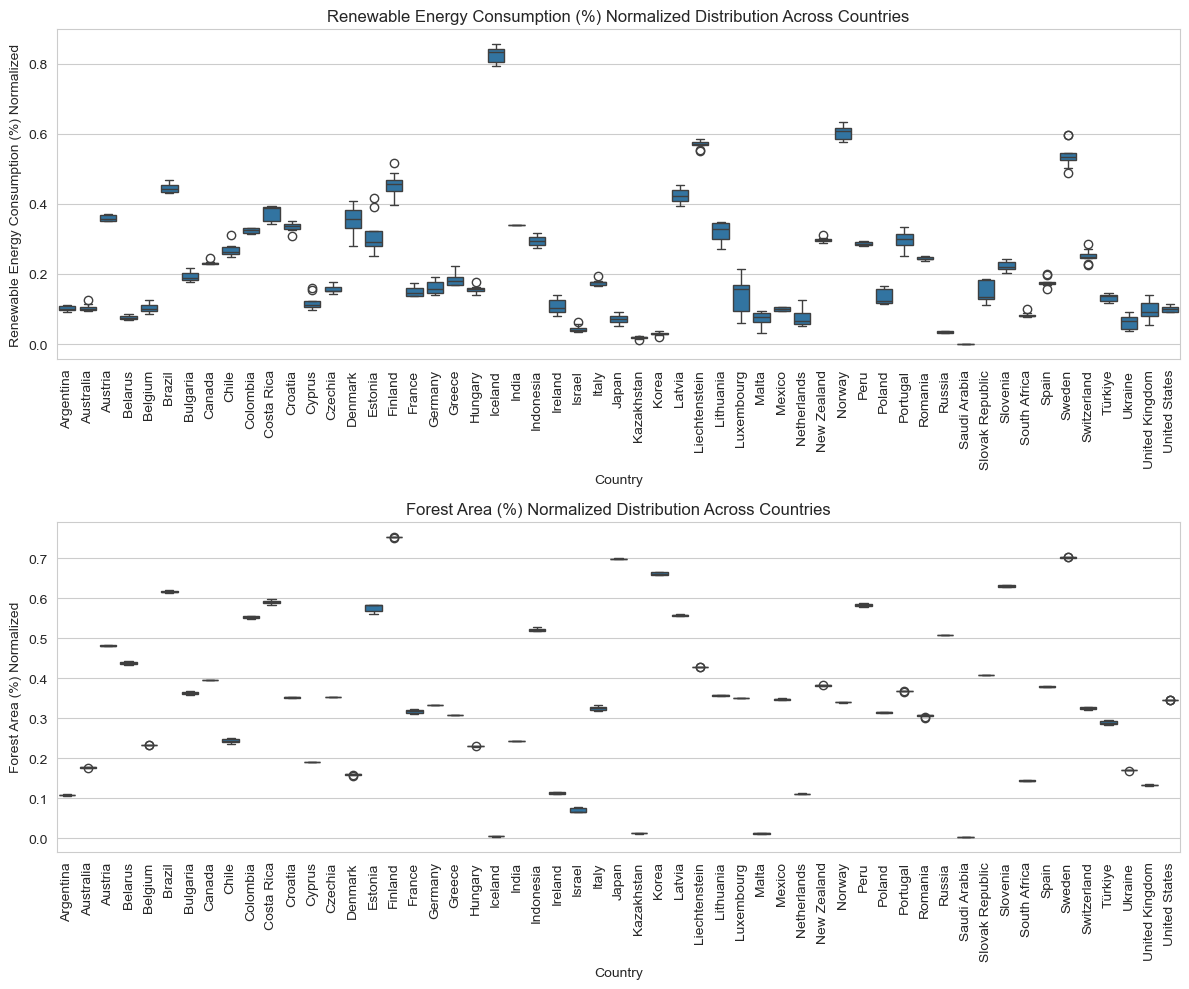

In [382]:
from sklearn.preprocessing import MinMaxScaler
import matplotlib.pyplot as plt
import seaborn as sns

# 绘制归一化数据的分布图（例如，只绘制部分列）
normalized_columns = [f"{col} Normalized" for col in columns_to_normalize]

# 创建子图，逐列展示归一化分布
fig, axes = plt.subplots(len(normalized_columns), 1, figsize=(12, 5 * len(normalized_columns)))
for i, column in enumerate(normalized_columns):
    sns.boxplot(
        x=merged_data.index.get_level_values("Country"),
        y=merged_data[column],
        ax=axes[i]
    )
    axes[i].set_title(f"{column} Distribution Across Countries")
    axes[i].set_xlabel("Country")
    axes[i].set_ylabel(column)
    axes[i].tick_params(axis='x', rotation=90)

plt.tight_layout()
plt.show()


In [383]:
# Overall variance
overall_var = merged_data["Emission Value"].var()

# Between-country variance
country_means = merged_data.groupby("Country")["Emission Value"].mean()
between_var = country_means.var()

# Within-country variance
within_var = merged_data.groupby("Country")["Emission Value"].apply(lambda x: x.var()).mean()

# 打印结果
print(f"Overall Variance: {overall_var}")
print(f"Between-Country Variance: {between_var}")
print(f"Within-Country Variance: {within_var}")


Overall Variance: 20.64293442447868
Between-Country Variance: 23.22235512469151
Within-Country Variance: 0.5885785719322406


In [384]:
pip install linearmodels

Note: you may need to restart the kernel to use updated packages.


固定效应分析

In [385]:
import statsmodels.api as sm  # For linear regression and hypothesis testing
from linearmodels.panel import PanelOLS, RandomEffects  # For panel data analysis (fixed-effects, random-effects)

# 定义变量
independent_vars = [
    "Industry Value Added (% of GDP)",
    "Log GDP (US$)",
    "Log GDP per Capita (US$)",
    "Renewable Energy Consumption (%) Normalized",
    "Forest Area (%) Normalized"
]
dependent_var = "Emission Value Normalized"

# 定义自变量和因变量
X = merged_data[independent_vars]
X = sm.add_constant(X)  # 添加常数项
y = merged_data[dependent_var]

# 创建固定效应模型
fixed_effects_model = PanelOLS(y, X, entity_effects=True, drop_absorbed=True)

# 拟合模型
fixed_effects_results = fixed_effects_model.fit()
fixed_effects_results


Dep. Variable:,Emission Value Normalized,R-squared:,0.6173
Estimator:,PanelOLS,R-squared (Between):,-10.474
No. Observations:,454,R-squared (Within):,0.6173
Date:,"Sat, Nov 23 2024",R-squared (Overall):,-10.785
Time:,21:22:41,Log-likelihood,1106.1
Cov. Estimator:,Unadjusted,,
,,F-statistic:,127.12
Entities:,55,P-value,0.0000
Avg Obs:,8.2545,Distribution:,"F(5,394)"
Min Obs:,1.0000,,
Max Obs:,9.0000,F-statistic (robust):,127.12


固定效应随机效应选择

In [386]:
# 随机效应模型
random_effects_model = RandomEffects(y, X)

# 拟合模型
random_effects_results = random_effects_model.fit()

# 输出结果
random_effects_results.summary



Dep. Variable:,Emission Value Normalized,R-squared:,0.5196
Estimator:,RandomEffects,R-squared (Between):,-0.1003
No. Observations:,454,R-squared (Within):,0.5647
Date:,"Sat, Nov 23 2024",R-squared (Overall):,-0.2529
Time:,21:22:41,Log-likelihood,1038.6
Cov. Estimator:,Unadjusted,,
,,F-statistic:,96.926
Entities:,55,P-value,0.0000
Avg Obs:,8.2545,Distribution:,"F(5,448)"
Min Obs:,1.0000,,
Max Obs:,9.0000,F-statistic (robust):,96.932


In [387]:
from scipy.stats import chi2  # For chi-square tests and hypothesis testing

# 提取系数和协方差矩阵
beta_fixed = fixed_effects_results.params
beta_random = random_effects_results.params
cov_fixed = fixed_effects_results.cov
cov_random = random_effects_results.cov

# Hausman 检验统计量
hausman_stat = (beta_fixed - beta_random).T @ np.linalg.inv(cov_fixed - cov_random) @ (beta_fixed - beta_random)

# 计算 p 值
p_value = 1 - chi2.cdf(hausman_stat, len(beta_fixed))

# 输出检验结果
print("----- Hausman 检验结果 -----")
print(f"Hausman 统计量: {hausman_stat}")
print(f"P 值: {p_value}")

# 根据 p 值决策
if p_value < 0.05:
    print("结论: 使用固定效应模型")
else:
    print("结论: 使用随机效应模型")


----- Hausman 检验结果 -----
Hausman 统计量: 39.17824334133003
P 值: 6.604219259243038e-07
结论: 使用固定效应模型


residual可视化

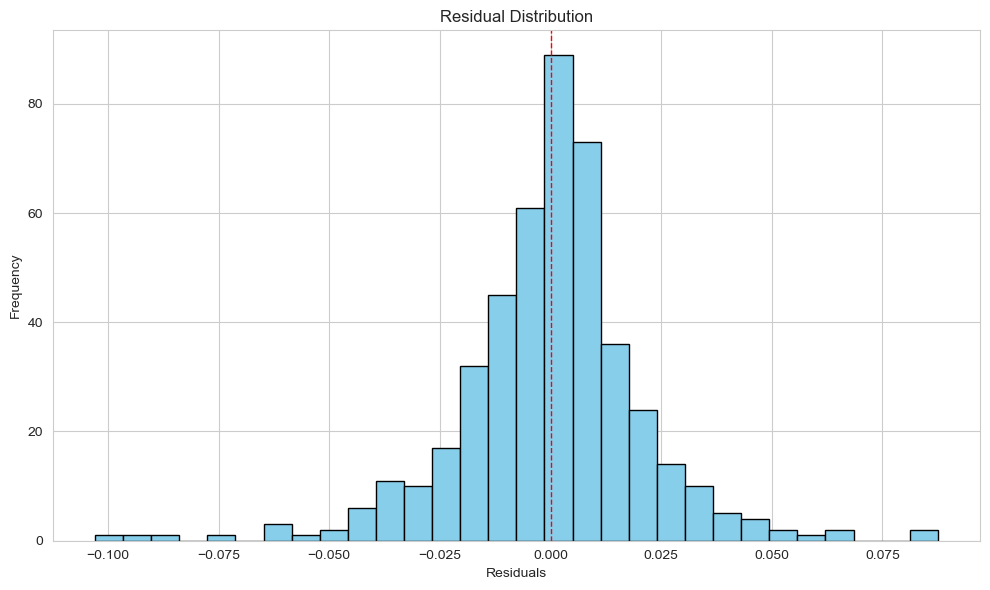

In [388]:
# 获取回归系数和置信区间
coefficients = fixed_effects_results.params
conf_int = fixed_effects_results.conf_int()

# 预测值和残差
predicted = fixed_effects_results.predict().fitted_values
residuals = fixed_effects_results.resids

# 残差分布直方图
plt.figure(figsize=(10, 6))
plt.hist(residuals, bins=30, color='skyblue', edgecolor='black')
plt.axvline(0, color='red', linestyle='--', linewidth=1)
plt.title("Residual Distribution")
plt.xlabel("Residuals")
plt.ylabel("Frequency")
plt.tight_layout()
plt.show()

线性可视化

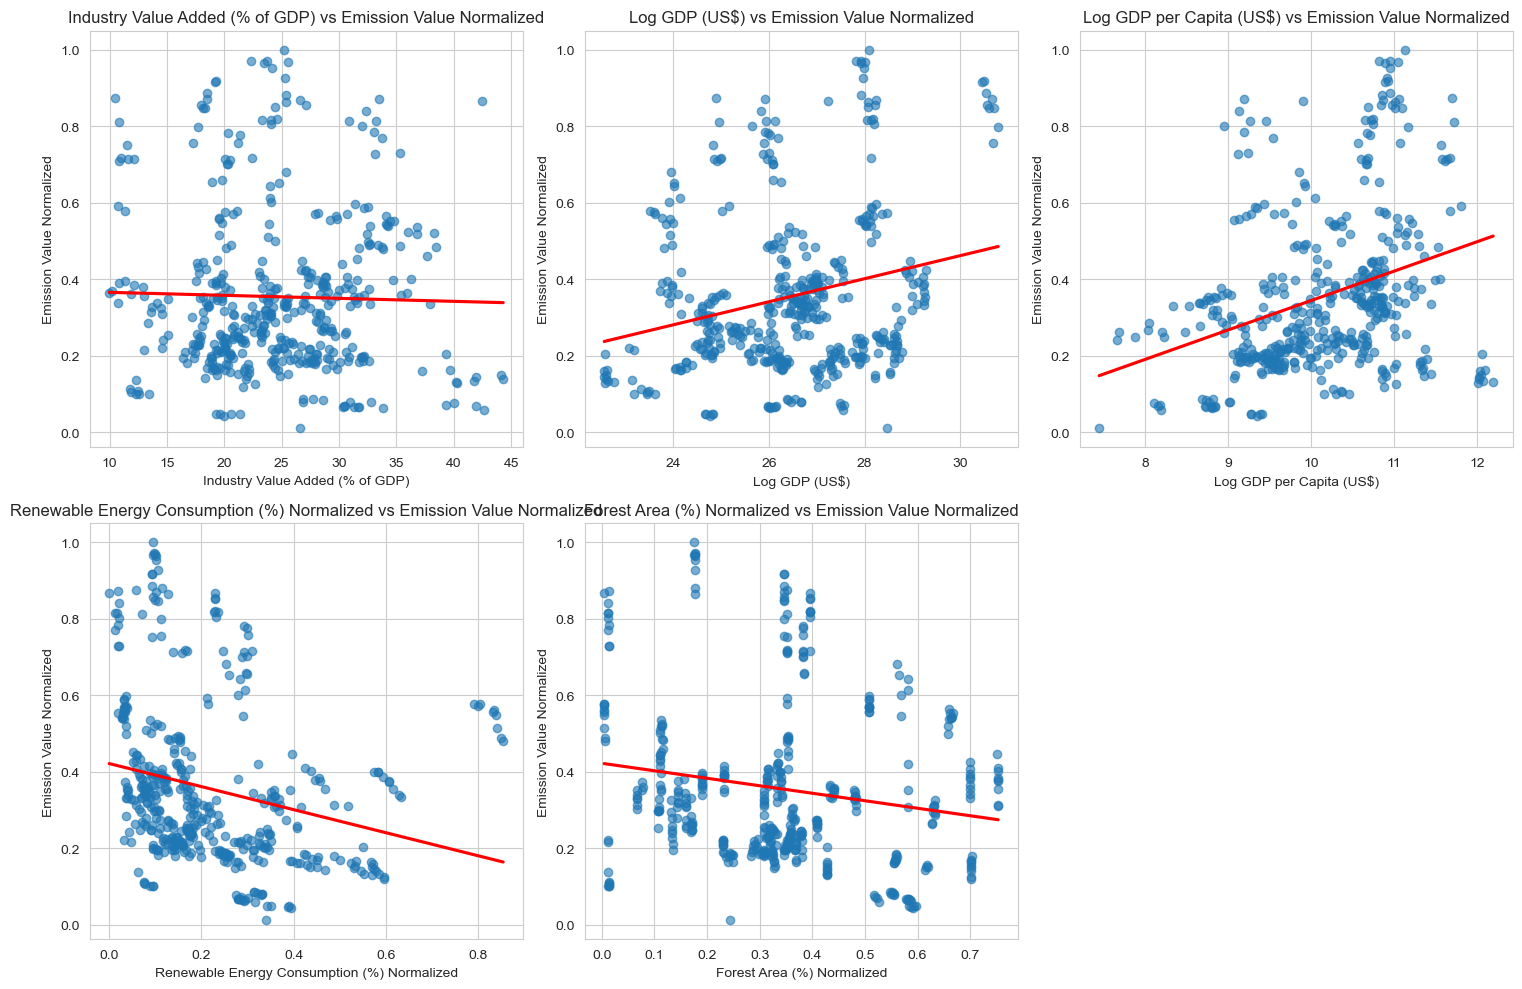

In [389]:


# 将多重索引还原为普通列，方便绘图
linear_data = merged_data.reset_index()

# 设置图表风格
sns.set_style("whitegrid")

# 创建多个散点图和回归拟合线
plt.figure(figsize=(15, 10))

# 遍历每个独立变量
for i, var in enumerate(independent_vars, 1):
    plt.subplot(2, 3, i)  # 2行3列的布局
    sns.regplot(
        x=linear_data[var],
        y=linear_data[dependent_var],
        scatter_kws={'alpha': 0.6},  # 调整散点透明度
        line_kws={'color': 'red'},  # 设置拟合线的颜色
        ci=None  # 不显示置信区间
    )
    plt.title(f"{var} vs {dependent_var}")
    plt.xlabel(var)
    plt.ylabel(dependent_var)

plt.tight_layout()
plt.show()
